## Aufgabe 2 Chi-Quadrat

In [39]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### a) Erzeugen Sie mit der Funktion numpy.random.chisquare 100 Zufallszahlen aus einer Chi-Quadrat-Verteilung mit 5 Freiheitsgraden.

In [40]:
np.random.seed(123)
nums = np.random.chisquare(df=5,size=100)

### b) Erstellen Sie mit den zuvor erzeugten Zufallszahlen ein eindimensionales Histogramm mit Fehlerbalken (Die Fehler pro Bin sollen $\sqrt{N_i}$ mit $N_i$ Einträgen pro Bin $i$ sein).

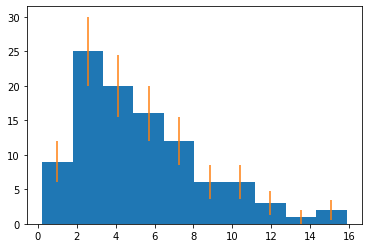

In [41]:
# bin Grenzen berechnen
# bin_num = 10
# nums_min = np.min(nums)
# nums_max = np.max(nums)
# step_size = (nums_max-nums_min)/(bin_num+1)
# bins = np.arange(start=nums_min, step=step_size, stop=nums_max)

fig, ax = plt.subplots()
N,bins,_ = ax.hist(nums,bins=10)
centers=bins[:-1]+np.diff(bins)/2
ax.errorbar(centers,N,yerr=np.sqrt(N),fmt='none');

### c) Stellen Sie das Histogramm und die wahre Dichte scipy.stats.chi2.pdf der Verteilung geeignet dar (Tipp: Normalisierung)

In [42]:
from scipy import stats

In [43]:
x = np.linspace(np.min(nums),np.max(nums),1000)
pdf = stats.chi2.pdf(x=x,df=5)

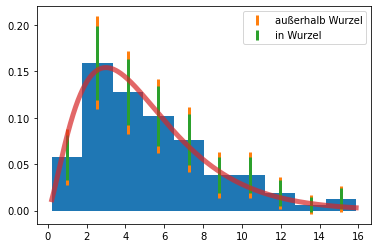

In [61]:
N_normal,bins,_ = plt.hist(nums,bins=10,density=True)
plt.errorbar(centers,N_normal,yerr=np.sqrt(N)/nums.size,fmt='none',elinewidth=3,label='außerhalb Wurzel')
plt.errorbar(centers,N_normal,yerr=np.sqrt(N_normal/nums.size),fmt='none',elinewidth=3,label='in Wurzel')
plt.plot(x,pdf,lw=5,alpha=0.7)
plt.legend();

### d) Nutzen Sie die Methode scipy.stats.chi2.fit um einen Fit an das in a) gezogene Sample durchzuführen (Hinweis: Eine solche Fit-Routine wird als Maximum Likelihood Fit bezeichnet)

In [90]:
params = stats.chi2.fit(nums)
print(params)

(5.43302467970163, -0.20886651980113946, 1.0058789045956251)


### e) Stellen Sie nun das Histogramm zusammen mit sowohl der gefitteten, als auch der wahren Chi-Quadrat-Verteilung geeignet dar.

In [91]:
from scipy import special

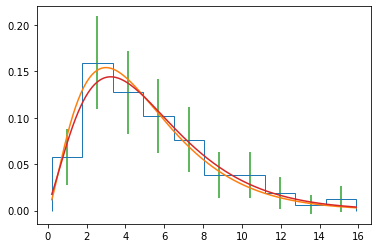

In [92]:
N_normal,bins,_ = plt.hist(nums,bins=10,density=True,histtype='step')
plt.plot(x,pdf)
plt.errorbar(centers,N_normal,yerr=np.sqrt(N)/nums.size,fmt='none')
plt.plot(x,stats.chi2.pdf(x,*params));

## Aufgabe 3 Geburtstage

### a) Schätzen Sie spontan, wieviele Personen benötigt werden, so dass die Wahrscheinlichkeit, dass zwei von ihnen am selben Tag Geburtstag haben größer als 0,5 ist?

365 Tage => 730 Personen damit W'keit >= 0.5

### b) Berechnen Sie nun: Wie groß ist die Wahrscheinlichkeit, dass in einer Gruppe von 𝑛 Personen zwei oder mehr am selben Tag1 Geburtstag haben? Für welche 𝑛 wird die Wahrscheinlichkeit 0,5 oder größer? Vernachlässigen Sie Schaltjahre.

https://de.wikipedia.org/wiki/Geburtstagsparadoxon#Wahrscheinlichkeit,_dass_mindestens_zwei_Personen_am_selben_Tag_Geburtstag_haben

In [117]:
from math import factorial

In [142]:
def P(x):
#    return 1 - np.math.factorial(365)/(365**x*np.math.factorial(365-x))
    product = 1
    for i in range(364,365-x,-1): product *= i
    return 1 -  product/365**(x-1)

0.5072972343239854


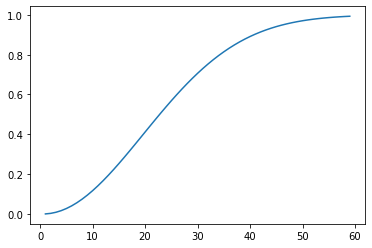

In [151]:
n = range(1,60)
P_n = [P(i) for i in n]
print(P(23))
#for i,p_i in zip(n,P_n):
#    print(f'{i=} \t {p_i=:.4f} \t {P(int(i))=:4f}')

plt.plot(n,P_n);